# WriteUP #

In [20]:
from numpy import *
from matplotlib.pyplot import *
import util
import utils
import dr
import datasets
import runClassifier
from softmax import *

## PART1 PCA ##


### Qpca1: Implementation ###
see dr.py

## Qpca2 ##

81
135


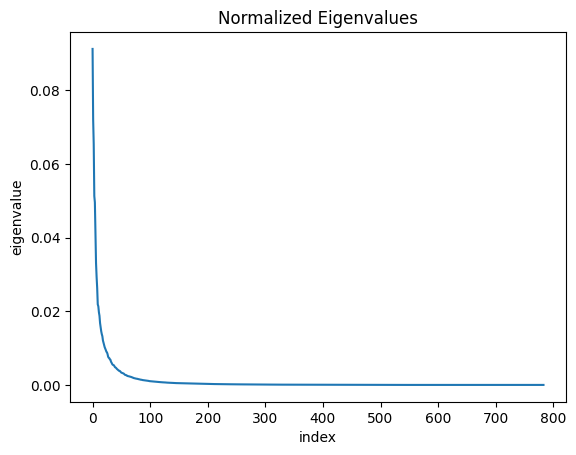

In [23]:
(X, Y) = datasets.loadDigits()
(P, Z, evals) = dr.pca(X, 784)

normalized_evals = evals/sum(evals)
eval_index = range(0, len(normalized_evals))

plot(eval_index, normalized_evals)
ylabel('eigenvalue')
xlabel('index')
title('Normalized Eigenvalues')

cumsum = cumsum(normalized_evals)
print (argmax(cumsum > 0.9))
print (argmax(cumsum > 0.95))


To determined how many eigenvalues are needed to account for 90% and 95%

we take sum of eigen values and divide eigen values by sum of eigen values to obtain normalized eigen vals
we compute cumulative sum of normalized values.
Then we use argmax on obtained value to find first occurence where we accounted 90% and 95% respectively.

To have accounted for 90% of the variance, 81 eigenvectors were needed to be included.
To have accounted for 95% of the variance, 135 eigenvectors were needed to be included.

## Qpca3 ##

50


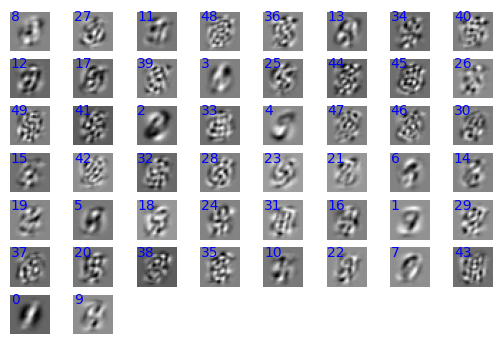

In [24]:
util.drawDigits(Z.T[:50,:], arange(50))
print (argmax(cumsum > 0.83))

They don't seem to represent digits with exception of few vaguely representing a digit.
Projecting dataset onto top 50 eigenvector represents about 83% varaince in the data missing few details.
They make up basic structure of digits but individually wouldn't resemble a digit 


## PART II Softmax Regression ##

### QSR1 ###

(1)<br>
Given probability<br>
$P[y = i] = \frac{e^{\vec{w_i}\cdot\vec{x}}}{\sum_{j}e^{\vec{w_j}\cdot\vec{x}}}$


Sum of probabilities:<br>
$\sum_{i}P[y = i] = \sum_{i}\frac{e^{\vec{w_i}\cdot\vec{x}}}{\sum_{j}e^{\vec{w_j}\cdot\vec{x}}} =\frac{\sum_{i}e^{\vec{w_i}\cdot\vec{x}}}{\sum_{j}e^{\vec{w_j}\cdot\vec{x}}} $

Notice that numerator and denominator is equal now, so 

$\frac{\sum_{i}e^{\vec{w_i}\cdot\vec{x}}}{\sum_{j}e^{\vec{w_j}\cdot\vec{x}}}= 1$



(2)<br>

$W$: is the weight matrix in which each row $i$ is the weight vector $\vec{w_i}$<br>
Assuming input features have D dimension thus $\vec{w}$ is a D dimensional vector and there are N amount of classes,<br>
$W$ has dimension $N \times D$ <br><br>

$X$:  is the input matrix in which each column $j$ is the single example $\vec{w_j}$.<br>
Assuming input features have $D$ dimension, and $M$ examples then <br> 
$X$ has $D \times M$ dimension<br><br>


$WX$: is the dot product of $WX$.  Given $n\times m$ matrix and  $m \times n$ matrix  resulting matrix of dot product is $n \times n $ <br>
Since $W$ has dimension $N \times D$  and  $X$ has $D \times M$ dimension<br>
$WX$ has $N \times M$ dimension

### QSR2:Implementation ###
see softmay.py

### QSR3 ###
(1) 
Our probability is 
$P[y = i] = \frac{e^{{W X[i]}}}{\sum_{j}e^{{W X[j]}}}$

For ease of read, we'll let Max = max(W_X)
Subtradct both numerator and denominator W_X  by Max

$P[y = i] = \frac{e^{{W X[i]-Max}}}{\sum_{j}e^{{W X[j]}-Max}}$

Now, This equation is eqaul to orignial equation since dividing both denominator and numerator by same amount $e^{-Max}$ which would not alter the result
gives our original equation. 


$P[y = i] = \frac{\frac{e^{{W X[i]-Max}}}{e^{-Max}}}{\frac{\sum_{j}e^{{W X[j]}-Max}}{e^{-Max}}}$ =$\frac{e^{{W X[i]}}}{\sum_{j}e^{{W X[j]}}}$

Therefore, W_X = W_X - np.max(W_X) does not affect the predicted probabilities <br>


(2)
Since our equation is exponentially gorwing from the entries in W_X, value can grow large very quickly.
Too big value may cause overflow which would lead to inaccuracte and instable result.

Subtracting maximum value as seen in (1) does not alter the result and helps keep the value more manageable than
usiing original W_X.

### QSR4 ###

In [ ]:
exSize = 28*28
numClasses = 10
sm = SoftmaxRegression(numClasses, exSize)
X, Y = utils.loadMNIST('data/train-images.idx3-ubyte', 'data/train-labels.idx1-ubyte')
testX, testY = utils.loadMNIST('data/t10k-images.idx3-ubyte', 'data/t10k-labels.idx1-ubyte')

size,trainAcc,testAcc =runClassifier.learningCurve(sm,numClasses,exSize,X,Y,testX,testY)



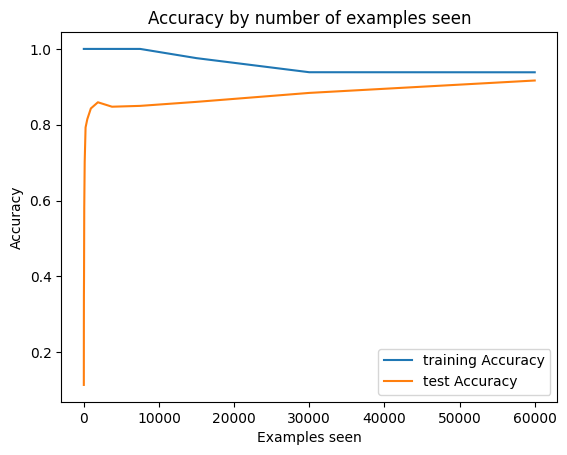

In [22]:
plot(size,trainAcc, label ='training Accuracy')
plot(size,testAcc, label = 'test Accuracy')
title("Accuracy by number of examples seen")
xlabel("Examples seen")
ylabel("Accuracy")
legend()


at the start, model overfits the training data with perfect accuracy on training and low accuracy on test.
As the number of examples seen grow, the accuracy difference between training and test closes and by the end, there doesn't seem to be
clear overfitting nor underfitting.

## PART III NN ##

### Qnn1.3 ###

After running run_nn.py with default values: atch size 128, learning rate of 0.01,  20 Epochs 
result is:<br>
loss:0.09871    accuracy:0.94770

### Qnn 1.4 ###
One reason to use random numbers to initialize weight is to break symmetry. Bides that are side-by-side in a hidden layer connected to same inputs should have different weights for the model to update weight.  Otherwise, each neuron in the layer will compute the same output during forward pass and backpropagation receiving same gradient as well updating weights in the same way.  This causes maintaining symmetricity thorughout training process causing the model to be stuck failing to make any changes to the network weights.
Initializing with random weights help break symmetry and resolve this issue.


### Qnn2 ###
(3)
I have decided to implement new optimzer for NN. I have implemented Adamsolver optimzer instead.
Initial beta 1= 0.9,  beta 2 = 0.999,  epsilon = 1e-8

Using same values from Qnn1.3 didn't show much difference between two so I have increased batch size to exaggerate the difference over epochs
and one with adamsolver seemed that 0.01 learning rate to be too high as it would overshoot so learning rate was reduced to 0.001 and 
number of epochs were increased to compensate for bigger batchsize and lower learning rate.

I have run NN with SGD and Adamsolver with learning rate of 0.001, batchsize 512  over 100 epoch.
Using modified version of run_nn.py named run_nn2.py to return numpy array of epochs and loss instead of printing to terminal.






In [16]:
#see run_nn2.py for details
#run_nn2.main takes learning rate, max epcoch, batch size,input dim, output dim as arguments.   hidden_layers=[256, 256], output dimension=10 are fixed.  
import run_nn2

sgdEpoch,sgdLoss,adamEpoch,adamLoss = run_nn2.main(0.001,100,512,784,10)


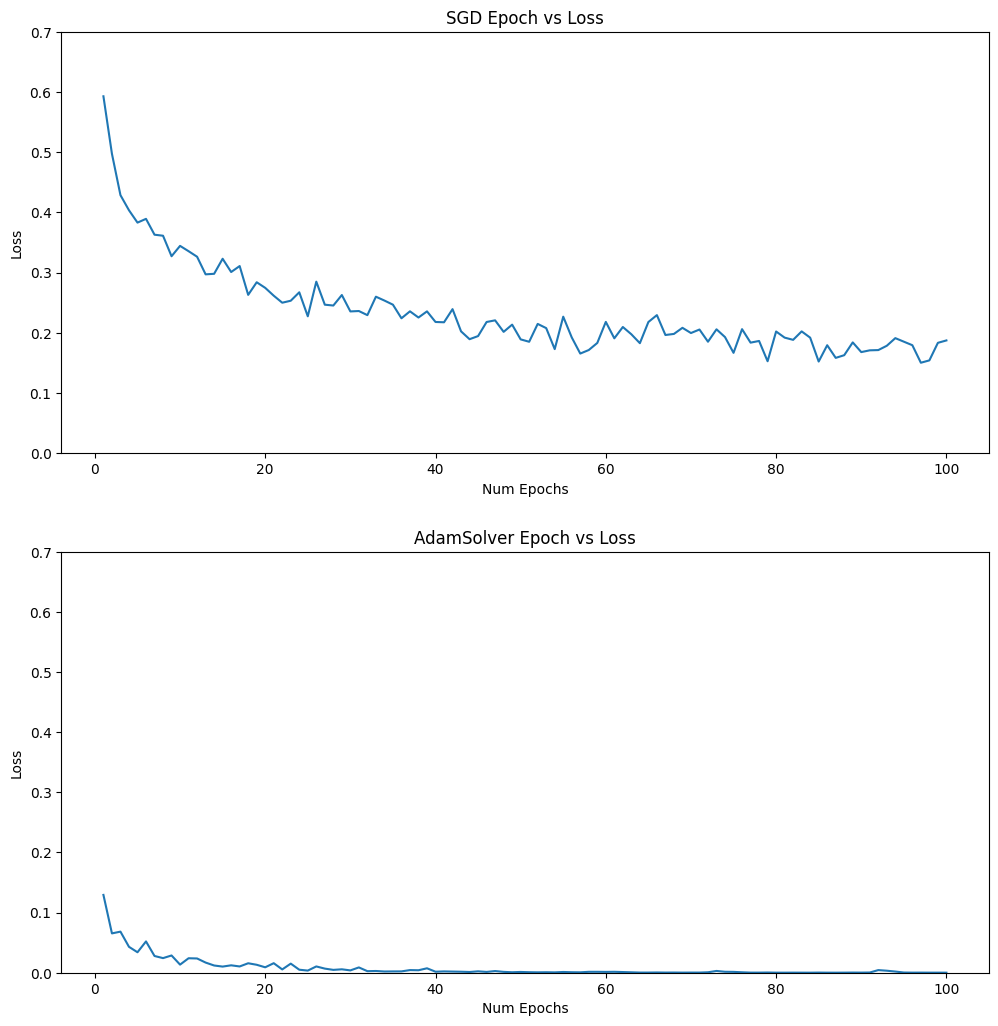

In [17]:
#plotting
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(2,figsize=(10, 10))
fig.tight_layout(h_pad=5)


ax1.plot(sgdEpoch,sgdLoss)
ax2.plot(adamEpoch,adamLoss)

ax1.set_title('SGD Epoch vs Loss')
ax2.set_title('AdamSolver Epoch vs Loss')

ax1.set(xlabel='Num Epochs', ylabel='Loss')
ax2.set(xlabel='Num Epochs', ylabel='Loss')

ax1.set_ylim(0,0.7)
ax2.set_ylim(0,0.7)

plt.show()

From the graph, it seems that Adamsolver converges faster(less number of epochs) at same sample numbers of input dimension=784.
Trying various different input dim brough about similar result.

Seems that adamsolver is better at optimizing this task than SGD.


